In [50]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

In [73]:
qr = QuantumRegister(3, name="q")    
crz = ClassicalRegister(1, name="crz") 
crx = ClassicalRegister(1, name="crx") 
c = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx,c)

In [74]:
##creating bell state 

teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.barrier()

In [75]:
##applying alice's gates

teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.barrier()
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

teleportation_circuit.barrier()

In [76]:
teleportation_circuit.draw()

┌───┐      ░      ┌───┐ ░ ┌─┐    ░ 
  q_0: ┤ H ├──────░───■──┤ H ├─░─┤M├────░─
       ├───┤      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░─
            └───┘ ░            ░  ║  ║  ░ 
crz: 1/═══════════════════════════╩══╬════
                                  0  ║    
                                     ║    
crx: 1/══════════════════════════════╩════
                                     0    
                                          
 c5: 1/═══════════════════════════════════

In [77]:
teleportation_circuit.x(2).c_if(crx, 1) 
teleportation_circuit.z(2).c_if(crz, 1)

In [78]:
teleportation_circuit.draw()

┌───┐      ░      ┌───┐ ░ ┌─┐    ░               
  q_0: ┤ H ├──────░───■──┤ H ├─░─┤M├────░───────────────
       ├───┤      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─┬─┘  └─┬─┘ 
                                  ║  ║       │   ┌──┴──┐
crz: 1/═══════════════════════════╩══╬═══════╪═══╡ = 1 ╞
                                  0  ║    ┌──┴──┐└─────┘
crx: 1/══════════════════════════════╩════╡ = 1 ╞═══════
                                     0    └─────┘       
 c5: 1/═════════════════════════════════════════════════

In [79]:
teleportation_circuit.measure(2,2)

In [80]:
teleportation_circuit.draw()

┌───┐      ░      ┌───┐ ░ ┌─┐    ░                  
  q_0: ┤ H ├──────░───■──┤ H ├─░─┤M├────░──────────────────
       ├───┤      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                  
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──────────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ ┌─┐
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─┤M├
            └───┘ ░            ░  ║  ║  ░  └─┬─┘  └─┬─┘ └╥┘
                                  ║  ║       │   ┌──┴──┐ ║ 
crz: 1/═══════════════════════════╩══╬═══════╪═══╡ = 1 ╞═╬═
                                  0  ║    ┌──┴──┐└─────┘ ║ 
crx: 1/══════════════════════════════╩════╡ = 1 ╞════════╬═
                                     0    └─────┘        ║ 
 c5: 1/══════════════════════════════════════════════════╩═
                                                         0

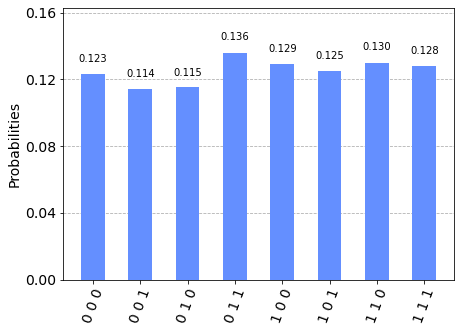

In [81]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(teleportation_circuit,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

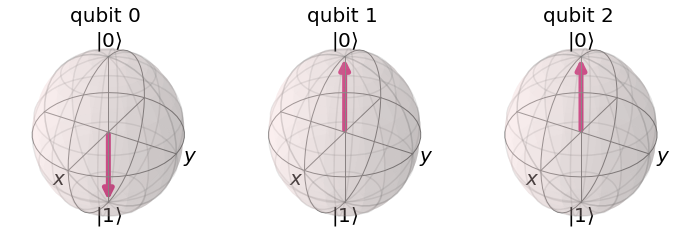

In [83]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(teleportation_circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)